# Libraries & CSV

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

# Data Cleaning

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean()).astype(int)
train_data['Fare']=train_data['Fare'].fillna(train_data['Fare'].mean())
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean()).astype(int)
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())
test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S


In [15]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.191388,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.654104,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data visulization

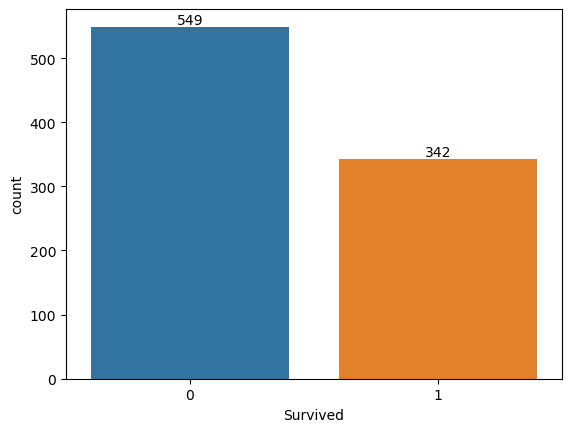

In [16]:
ax = sns.countplot(x="Survived",data=train_data)
for bars in ax.containers:
    ax.bar_label(bars)

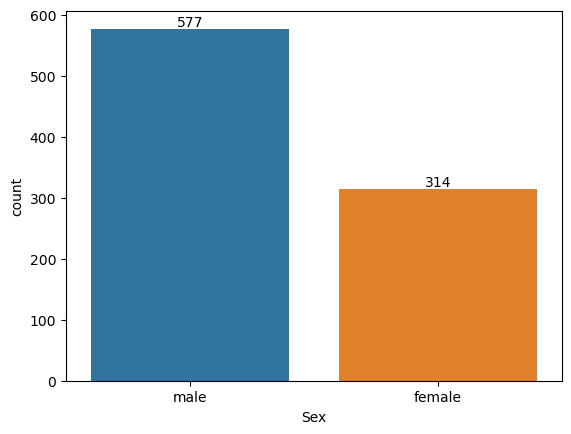

In [17]:
ax = sns.countplot(x="Sex",data=train_data)
for bars in ax.containers:
    ax.bar_label(bars)

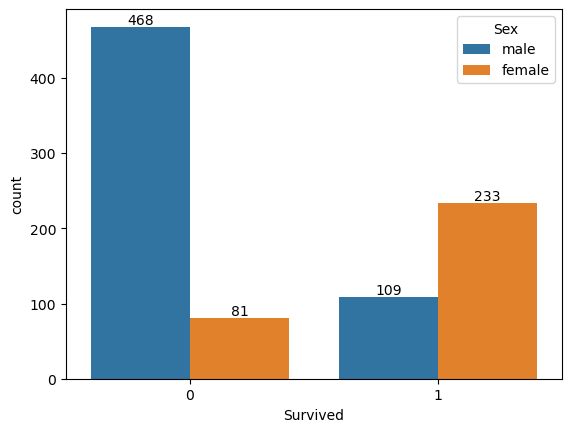

In [18]:
ax = sns.countplot(x="Survived",hue="Sex",data=train_data)

for bars in ax.containers:
    ax.bar_label(bars)

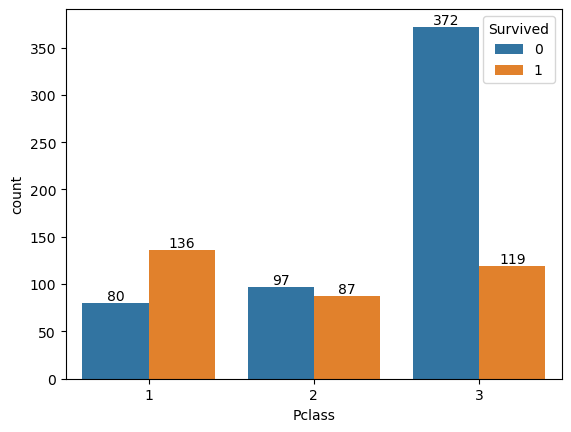

In [19]:
ax = sns.countplot(x="Pclass",hue="Survived",data=train_data)

for bars in ax.containers:
    ax.bar_label(bars)

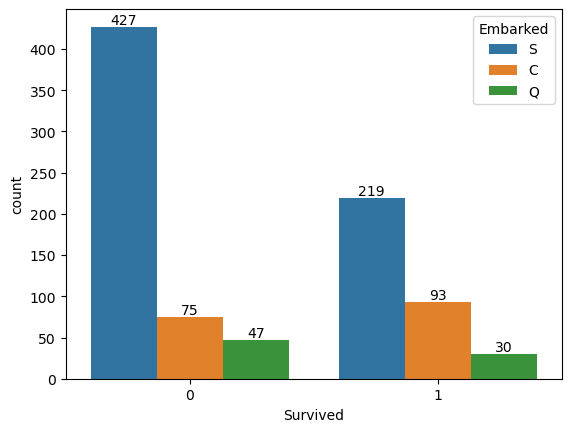

In [20]:
ax = sns.countplot(x="Survived",hue="Embarked",data=train_data)

for bars in ax.containers:
    ax.bar_label(bars)

# ML Model

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report


In [22]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Age"]
x = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()


In [25]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
   # sns.heatmap(confusion_matrix(pre,y_test),annot=True ,fmt='0.1f',linewidth=.9)
    print(model)
    print('accuracy is : ' ,(int(accuracy*100)),'%')
    print('recall is : ', (int(recall*100)),'%')
    print("f1 is : ", (int(f1*100)),'%')
    print(" ")

#### Train Model

In [26]:
cal(model1)
cal(model2)
cal(model3)
cal(model4)

LogisticRegression()
accuracy is :  80 %
recall is :  74 %
f1 is :  74 %
 
SVC()
accuracy is :  64 %
recall is :  85 %
f1 is :  15 %
 
RandomForestClassifier()
accuracy is :  81 %
recall is :  76 %
f1 is :  74 %
 
GradientBoostingClassifier()
accuracy is :  82 %
recall is :  81 %
f1 is :  75 %
 


#### predicted Model (X_test)

In [33]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':pre})
    output.to_csv('submission.csv', index=False)
    print("Your submission was successfully saved!")
    print(output.head(20))

In [34]:
cal(model3)

Your submission was successfully saved!
    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         1
4           896         0
5           897         0
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         0


Your submission was successfully saved!
    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         0
5           897         1
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         0
